# Wildtype Simulation

1.1. Basic Python Libraries

In [1]:
import cobra
import cobra.test
import os
import os.path
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import sys
from time import time
from os.path import join
from cobra.util.solver import linear_reaction_coefficients
from cobra.flux_analysis import flux_variability_analysis
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

import escher
from escher import Builder
from time import sleep

1.2. Model upload and analysis

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_coa_p "M_Coenzyme_A_C21H32N7O16P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_coa_p "M_Coenzyme_A_C21H32N7O16P3S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_nmn_p "M_NMN_C11H14N2O8P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nmn_p "M_NMN_C11H14N2O8P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dc2coa_p "M_trans_Dec_2_enoyl_CoA_C31H48N7O17P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dc2coa_p "M_trans_Dec_2_enoyl_CoA_C31H48N7O17P3S">
Use of CHARGE in the no

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_icit_p "M_Isocitrate_C6H5O7">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tdcoa_p "M_Tetradecanoyl_CoA__n_C140CoA__C35H58N7O17P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tdcoa_p "M_Tetradecanoyl_CoA__n_C140CoA__C35H58N7O17P3S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_asp_L_p "M_L_Aspartate_C4H6NO4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_asp_L_p "M_L_Aspartate_C4H6NO4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ocdca_p "M_octadecanoate__n_C180__C18H35O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ocdca_p "M_octadecanoate__n_C180__C18H35O2">
Use of CHARGE in the notes element is discouraged, use f

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_adp_p "M_ADP_C10H12N5O10P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_adp_p "M_ADP_C10H12N5O10P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trdrd_p "M_Reduced_thioredoxin_XH2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trdrd_p "M_Reduced_thioredoxin_XH2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pyr_p "M_Pyruvate_C3H3O3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pyr_p "M_Pyruvate_C3H3O3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_stcoa_p "M_Stearoyl_CoA__n_C180CoA__C39H66N7O17P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_stcoa_p "M_Stearoyl_CoA__n_C180Co

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nadh_r "M_Nicotinamide_adenine_dinucleotide___reduced_C21H27N7O14P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_6pgl_r "M_6_phospho_D_glucono_1_5_lactone_C6H9O9P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6pgl_r "M_6_phospho_D_glucono_1_5_lactone_C6H9O9P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ttccoa_r "M_tetracosanoyl_CoA___n_C240CoA__C45H78N7O17P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ttccoa_r "M_tetracosanoyl_CoA___n_C240CoA__C45H78N7O17P3S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_nadph_r "M_Nicotinamide_adenine_dinucleotide_phosphate___reduced_C21H26N7O17P3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula ins

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_iletrna_c "M_L_Isoleucyl_tRNA_Ile__C6H12NOR">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4abz_c "M_4_Aminobenzoate_C7H6NO2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4abz_c "M_4_Aminobenzoate_C7H6NO2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cdpea_c "M_CDPethanolamine_C11H19N4O11P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cdpea_c "M_CDPethanolamine_C11H19N4O11P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ametam_c "M_S_Adenosylmethioninamine_C14H24N6O3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ametam_c "M_S_Adenosylmethioninamine_C14H24N6O3S">
Use of CHARGE in the notes element is discouraged, u

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_taur_c "M_Taurine_C2H7NO3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_taur_c "M_Taurine_C2H7NO3S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ertascb_D_c "M_D_erythro_Ascorbate_C5H6O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ertascb_D_c "M_D_erythro_Ascorbate_C5H6O5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4aabutn_c "M_4_Acetamidobutanoate_C6H10NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4aabutn_c "M_4_Acetamidobutanoate_C6H10NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4hbz_c "M_4_Hydroxybenzoate_C7H5O3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_zym_int2_c "M_zymosterol_intermediate_2_C27H42O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_zym_int2_c "M_zymosterol_intermediate_2_C27H42O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_aps_c "M_Adenosine_5__phosphosulfate_C10H12N5O10PS">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_aps_c "M_Adenosine_5__phosphosulfate_C10H12N5O10PS">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cer1_24_c "M_Ceramide_1__Sphinganinen_C240__C42H85NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cer1_24_c "M_Ceramide_1__Sphinganinen_C240__C42H85NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_mettrna_c "M_L_Methionyl_tRNA__Met__C5H10NOSR">
Us

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pepd_c "M_peptide_C2H4NO2RC2H2NOR">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pepd_c "M_peptide_C2H4NO2RC2H2NOR">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_L2aadp6sa_c "M_L_2_Aminoadipate_6_semialdehyde_C6H11NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_L2aadp6sa_c "M_L_2_Aminoadipate_6_semialdehyde_C6H11NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_idp_c "M_IDP_C10H11N4O11P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_idp_c "M_IDP_C10H11N4O11P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_occoa_c "M_Octanoyl_CoA__n_C80CoA__C29H46N7O17P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFo

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cholp_c "M_Choline_phosphate_C5H13NO4P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cholp_c "M_Choline_phosphate_C5H13NO4P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2mahmp_c "M_2_Methyl_4_amino_5_hydroxymethylpyrimidine_diphosphate_C6H8N3O7P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2mahmp_c "M_2_Methyl_4_amino_5_hydroxymethylpyrimidine_diphosphate_C6H8N3O7P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_mev_R_c "M__R__Mevalonate_C6H11O4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mev_R_c "M__R__Mevalonate_C6H11O4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_manmi1p_D_c "M_mannose_1D_myo_Inositol_1_phosphate_C12

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_myrsACP_c "M_Myristoyl_ACP__n_C140ACP__C25H47N2O8PRS">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_myrsACP_c "M_Myristoyl_ACP__n_C140ACP__C25H47N2O8PRS">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_man6p_c "M_D_Mannose_6_phosphate_C6H11O9P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_man6p_c "M_D_Mannose_6_phosphate_C6H11O9P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dkmpp_c "M_2_3_diketo_5_methylthio_1_phosphopentane_C6H9O6PS">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dkmpp_c "M_2_3_diketo_5_methylthio_1_phosphopentane_C6H9O6PS">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ncam_c "M_Nicotinamide_C6H6N2O">
Use of FORM

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thf_c "M_5_6_7_8_Tetrahydrofolate_C19H21N7O6">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4abutn_c "M_4_Aminobutanal_C4H10NO">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4abutn_c "M_4_Aminobutanal_C4H10NO">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_epm_c "M_Epimelibiose_C12H22O11">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_epm_c "M_Epimelibiose_C12H22O11">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2oxoadp_c "M_2_Oxoadipate_C6H6O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2oxoadp_c "M_2_Oxoadipate_C6H6O5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ipc124_SC_c "

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_asptrna_c "M_L_Aspartyl_tRNA_Asp__C4H5NO3R">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_asptrna_c "M_L_Aspartyl_tRNA_Asp__C4H5NO3R">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_Lfmkynr_c "M_L_Formylkynurenine_C11H12N2O4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_Lfmkynr_c "M_L_Formylkynurenine_C11H12N2O4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_23dpg_c "M_2_3_Disphospho_D_glycerate_C3H3O10P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_23dpg_c "M_2_3_Disphospho_D_glycerate_C3H3O10P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_acrn_c "M_O_Acetylcarnitine_C9H17NO4">
Use of FORMULA in the notes element is discourage

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pheac_c "M_Phenethyl_acetate_C10H12O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pheac_c "M_Phenethyl_acetate_C10H12O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4gudbutn_c "M_4_Guanidinobutanoate_C5H11N3O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4gudbutn_c "M_4_Guanidinobutanoate_C5H11N3O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_thfglu_c "M_Tetrahydrofolyl_Glu_2__C24H27N8O9">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thfglu_c "M_Tetrahydrofolyl_Glu_2__C24H27N8O9">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_hxan_c "M_Hypoxanthine_C5H4N4O">
Use of FORMULA in the notes element is discouraged, use fbc:chemi

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppbng_c "M_Porphobilinogen_C10H13N2O4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_malcoa_c "M_Malonyl_CoA_C24H33N7O19P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_malcoa_c "M_Malonyl_CoA_C24H33N7O19P3S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_thr_L_c "M_L_Threonine_C4H9NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thr_L_c "M_L_Threonine_C4H9NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pacald_c "M_Phenylacetaldehyde_C8H8O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pacald_c "M_Phenylacetaldehyde_C8H8O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_amp2p_

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tagdp_D_c "M_D_Tagatose_1_6_biphosphate_C6H10O12P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tagdp_D_c "M_D_Tagatose_1_6_biphosphate_C6H10O12P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tre6p_c "M_alpha_alpha__Trehalose_6_phosphate_C12H21O14P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tre6p_c "M_alpha_alpha__Trehalose_6_phosphate_C12H21O14P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dgsn_c "M_Deoxyguanosine_C10H13N5O4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dgsn_c "M_Deoxyguanosine_C10H13N5O4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ind3eth_c "M_Indole_3_ethanol_C10H11NO">
Use of FORMULA in the notes

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_paps_c "M_3__Phosphoadenylyl_sulfate_C10H11N5O13P2S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cbp_c "M_Carbamoyl_phosphate_CH2NO5P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cbp_c "M_Carbamoyl_phosphate_CH2NO5P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_alltt_c "M_Allantoate_C4H7N4O4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_alltt_c "M_Allantoate_C4H7N4O4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2obut_c "M_2_Oxobutanoate_C4H5O3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2obut_c "M_2_Oxobutanoate_C4H5O3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trna

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ttdcea_c "M_tetradecenoate__n_C141__C14H25O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_orn_c "M_Ornithine_C5H13N2O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_orn_c "M_Ornithine_C5H13N2O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3php_c "M_3_Phosphohydroxypyruvate_C3H2O7P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3php_c "M_3_Phosphohydroxypyruvate_C3H2O7P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_arab_L_c "M_L_Arabinose_C5H10O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_arab_L_c "M_L_Arabinose_C5H10O5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trnas

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_id3acald_c "M_Indole_3_acetaldehyde_C10H9NO">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_id3acald_c "M_Indole_3_acetaldehyde_C10H9NO">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2mbald_c "M_2_methylbutyraldehyde_C5H10O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2mbald_c "M_2_methylbutyraldehyde_C5H10O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ipdp_c "M_Isopentenyl_diphosphate_C5H9O7P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ipdp_c "M_Isopentenyl_diphosphate_C5H9O7P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_actn_R_c "M__R__Acetoin_C4H8O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemica

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3dhsk_c "M_3_Dehydroshikimate_C7H7O5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_iad_c "M_Indole_3_acetamide_C10H10N2O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_iad_c "M_Indole_3_acetamide_C10H10N2O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gly_c "M_Glycine_C2H5NO2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gly_c "M_Glycine_C2H5NO2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_melt_c "M_melibiitol_C12H24O11">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_melt_c "M_melibiitol_C12H24O11">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4pasp_c "M_4_Phospho_L_aspartate_

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptd145bp_SC_c "M_1_Phosphatidyl_D_myo_inositol_4_5_bisphosphate__yeast_specific_C4140H7444O1900P300">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ura_c "M_Uracil_C4H4N2O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ura_c "M_Uracil_C4H4N2O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cystrna_c "M_L_Cysteinyl_tRNA_Cys__C3H6NOSR">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cystrna_c "M_L_Cysteinyl_tRNA_Cys__C3H6NOSR">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_xyl_D_c "M_D_Xylose_C5H10O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xyl_D_c "M_D_Xylose_C5H10O5">
Use of CHARGE in the notes element is discouraged,

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glu_L_c "M_L_Glutamate_C5H8NO4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glu_L_c "M_L_Glutamate_C5H8NO4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_leutrna_c "M_L_Leucyl_tRNA_Leu__C6H12NOR">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_leutrna_c "M_L_Leucyl_tRNA_Leu__C6H12NOR">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trnaleu_c "M_tRNA_Leu__R">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trnaleu_c "M_tRNA_Leu__R">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glyald_c "M_D_Glyceraldehyde_C3H6O3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glyald_c "M_D_Glyceraldehyde

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glu5p_c "M_L_Glutamate_5_phosphate_C5H8NO7P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_thmtp_c "M_Thiamin_triphosphate_C12H16N4O10P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thmtp_c "M_Thiamin_triphosphate_C12H16N4O10P3S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2dhp_c "M_2_Dehydropantoate_C6H9O4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2dhp_c "M_2_Dehydropantoate_C6H9O4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_h2s_c "M_Hydrogen_sulfide_H2S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2s_c "M_Hydrogen_sulfide_H2S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dann_c "M_7_8_Diaminononanoate_C9H21N2O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dann_c "M_7_8_Diaminononanoate_C9H21N2O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_mi13456p_c "M_1D_myo_Inositol_1_3_4_5_6_pentakisphosphate_C6H7O21P5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mi13456p_c "M_1D_myo_Inositol_1_3_4_5_6_pentakisphosphate_C6H7O21P5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3mbald_c "M_3_Methylbutanal_C5H10O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3mbald_c "M_3_Methylbutanal_C5H10O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_urdglyc_c "M_____Ureidoglycolate_C3H5N2O4">
Use of FORMULA in the no

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pydxn_c "M_Pyridoxine_C8H11NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydxn_c "M_Pyridoxine_C8H11NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ptd4ino_SC_c "M_phosphatidyl_1D_myo_4_inositol__yeast_specific_C4140H7544O1600P200">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptd4ino_SC_c "M_phosphatidyl_1D_myo_4_inositol__yeast_specific_C4140H7544O1600P200">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_5dpmev_c "M__R__5_Diphosphomevalonate_C6H10O10P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5dpmev_c "M__R__5_Diphosphomevalonate_C6H10O10P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_imacp_c "M_3__Imidazol_4_yl__2

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pydam_c "M_Pyridoxamine_C8H13N2O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pydam_c "M_Pyridoxamine_C8H13N2O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gam1p_c "M_D_Glucosamine_1_phosphate_C6H13NO8P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gam1p_c "M_D_Glucosamine_1_phosphate_C6H13NO8P">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf_c "M_10_Formyltetrahydrofolate_C20H21N7O7">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_c "M_10_Formyltetrahydrofolate_C20H21N7O7">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_aspsa_c "M_L_Aspartate_4_semialdehyde_C4H7NO3">
Use of FORMULA in the notes element is discourag

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ddca_e "M_Dodecanoate__n_C120__C12H23O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_melib_e "M_Melibiose_C12H22O11">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_melib_e "M_Melibiose_C12H22O11">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_13BDglcn_e "M_1_3_beta_D_Glucan_C6H10O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13BDglcn_e "M_1_3_beta_D_Glucan_C6H10O5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trp_L_e "M_L_Tryptophan_C11H12N2O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trp_L_e "M_L_Tryptophan_C11H12N2O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3mop_e

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ibutoh_e "M_isobutyl_alcohol_C4H10O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ibutoh_e "M_isobutyl_alcohol_C4H10O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_xylt_e "M_Xylitol_C5H12O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xylt_e "M_Xylitol_C5H12O5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_h_e "M_H_H">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h_e "M_H_H">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_taur_e "M_Taurine_C2H7NO3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_taur_e "M_Taurine_C2H7NO3S">
Use of CHARGE in the notes element is discouraged, use f

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_urea_e "M_Urea_CH4N2O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_xan_e "M_Xanthine_C5H4N4O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_xan_e "M_Xanthine_C5H4N4O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_inost_e "M_myo_Inositol_C6H12O6">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_inost_e "M_myo_Inositol_C6H12O6">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dca_e "M_Decanoate__n_C100__C10H19O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dca_e "M_Decanoate__n_C100__C10H19O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glx_e "M_Glyoxylate_C2H1O3">
Use of FORMULA 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ocdca_e "M_octadecanoate__n_C180__C18H35O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_5aop_e "M_5_Amino_4_oxopentanoate_C5H9NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5aop_e "M_5_Amino_4_oxopentanoate_C5H9NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_akg_e "M_2_Oxoglutarate_C5H4O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_akg_e "M_2_Oxoglutarate_C5H4O5">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gthox_e "M_Oxidized_glutathione_C20H30N6O12S2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gthox_e "M_Oxidized_glutathione_C20H30N6O12S2">
Use of CHARGE in the notes element is discouraged, use fbc:char

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dttp_e "M_dTTP_C10H13N2O14P3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_epist_e "M_episterol_C28H46O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_epist_e "M_episterol_C28H46O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pacald_e "M_Phenylacetaldehyde_C8H8O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pacald_e "M_Phenylacetaldehyde_C8H8O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_val_L_e "M_L_Valine_C5H11NO2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_val_L_e "M_L_Valine_C5H11NO2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fecostest_SC_e "M_fecosterol_ester__yea

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_h2o_v "M_H2O_H2O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2o_v "M_H2O_H2O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tyr_L_v "M_L_Tyrosine_C9H11NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tyr_L_v "M_L_Tyrosine_C9H11NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_asp_L_v "M_L_Aspartate_C4H6NO4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_asp_L_v "M_L_Aspartate_C4H6NO4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ile_L_v "M_L_Isoleucine_C6H13NO2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ile_L_v "M_L_Isoleucine_C6H13NO2">
Use of CHARGE in the notes eleme

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_m1macchitppdol_g "M_alpha_D_mannosyl_beta_D_mannosyl_diacylchitobiosyldiphosphodolichol_C43H74N2O27P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_m1macchitppdol_g "M_alpha_D_mannosyl_beta_D_mannosyl_diacylchitobiosyldiphosphodolichol_C43H74N2O27P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_sdhlam_m "M_S_Succinyldihydrolipoamide_C12H20NO4S2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_sdhlam_m "M_S_Succinyldihydrolipoamide_C12H20NO4S2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tdeACP_m "M_cis_tetradec_7_enoyl_acyl_carrier_protein__n_C141__C25H45N2O8PRS">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tdeACP_m "M_cis_tetradec_7_enoyl_acyl_carrier_protein__n_C141

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fum_m "M_Fumarate_C4H2O4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_fum_m "M_Fumarate_C4H2O4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_his_L_m "M_L_Histidine_C6H9N3O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_his_L_m "M_L_Histidine_C6H9N3O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dnad_m "M_Deamino_NAD_C21H24N6O15P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dnad_m "M_Deamino_NAD_C21H24N6O15P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pe_SC_m "M_phosphatidylethanolamine__yeast_specific_C3740H7244N100O800P100">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_hemeA_m "M_Heme_A_C49H55FeN4O6">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hemeA_m "M_Heme_A_C49H55FeN4O6">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pa_SC_m "M_Phosphatidate__yeast_specific_C3540H6544O800P100">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pa_SC_m "M_Phosphatidate__yeast_specific_C3540H6544O800P100">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3ophb_5_m "M_3_Hexaprenyl_4_hydroxybenzoate_C37H53O3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ophb_5_m "M_3_Hexaprenyl_4_hydroxybenzoate_C37H53O3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_mal_L_m "M_L_Malate_C4H4O5">
Use of FORMULA in the notes element is 

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ocdcaACP_m "M_Octadecanoyl_ACP__n_C180ACP__C29H55N2O8PRS">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ocdcaACP_m "M_Octadecanoyl_ACP__n_C180ACP__C29H55N2O8PRS">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_itp_m "M_ITP_C10H11N4O14P3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_itp_m "M_ITP_C10H11N4O14P3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trdox_m "M_Oxidized_thioredoxin_X">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trdox_m "M_Oxidized_thioredoxin_X">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3c3hmp_m "M_3_Carboxy_3_hydroxy_4_methylpentanoate_C7H10O5">
Use of FORMULA in the notes element is discouraged, use fbc

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_h2o2_m "M_Hydrogen_peroxide_H2O2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2o2_m "M_Hydrogen_peroxide_H2O2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4hpro_LT_m "M_trans_4_Hydroxy_L_proline_C5H9NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4hpro_LT_m "M_trans_4_Hydroxy_L_proline_C5H9NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gly_m "M_Glycine_C2H5NO2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gly_m "M_Glycine_C2H5NO2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_nmn_m "M_NMN_C11H14N2O8P">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_nmn_m "M_NMN_C11H14N2

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trnahis_m "M_tRNA_His__R">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trnahis_m "M_tRNA_His__R">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_acorn_m "M_N2_Acetyl_L_ornithine_C7H14N2O3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_acorn_m "M_N2_Acetyl_L_ornithine_C7H14N2O3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_4hglusa_m "M_L_4_Hydroxyglutamate_semialdehyde_C5H9NO4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4hglusa_m "M_L_4_Hydroxyglutamate_semialdehyde_C5H9NO4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_fe2_m "M_Fe2_Fe">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Specie

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trnatyr_m "M_tRNA_Tyr__R">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trnatyr_m "M_tRNA_Tyr__R">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gua_m "M_Guanine_C5H5N5O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gua_m "M_Guanine_C5H5N5O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_coa_m "M_Coenzyme_A_C21H32N7O16P3S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_coa_m "M_Coenzyme_A_C21H32N7O16P3S">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pheme_m "M_Protoheme_C34H30FeN4O4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pheme_m "M_Protoheme_C34H30FeN4O4">
Use of CHARGE in t

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_hexdp_m "M_all_trans_Hexaprenyl_diphosphate_C30H49O7P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glu5sa_m "M_L_Glutamate_5_semialdehyde_C5H9NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glu5sa_m "M_L_Glutamate_5_semialdehyde_C5H9NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_thr_L_m "M_L_Threonine_C4H9NO3">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_thr_L_m "M_L_Threonine_C4H9NO3">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ahcys_m "M_S_Adenosyl_L_homocysteine_C14H20N6O5S">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ahcys_m "M_S_Adenosyl_L_homocysteine_C14H20N6O5S">
Use of CHARGE in the notes element 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_minohp_n "M_myo_Inositol_hexakisphosphate_C6H6O24P6">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_h2o_n "M_H2O_H2O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2o_n "M_H2O_H2O">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ppi_n "M_Diphosphate_HO7P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppi_n "M_Diphosphate_HO7P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dudp_n "M_dUDP_C9H11N2O11P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dudp_n "M_dUDP_C9H11N2O11P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_hcit_n "M_2_Hydroxybutane_1_2_4_tricarboxylate_C7H7O7">
Use of

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cdp_n "M_CDP_C9H12N3O11P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cdp_n "M_CDP_C9H12N3O11P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_dnad_n "M_Deamino_NAD_C21H24N6O15P2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dnad_n "M_Deamino_NAD_C21H24N6O15P2">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cbasp_n "M_N_Carbamoyl_L_aspartate_C5H6N2O5">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cbasp_n "M_N_Carbamoyl_L_aspartate_C5H6N2O5">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLUPRT "R_GLUPRT">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OAAt "R_OAAt">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLXtp "R_GLXtp">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_inost_e_ "R_EX_inost_e_">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SACCD1 "R_SACCD1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SACCD1 "R_SACCD1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SACCD2 "R_SACCD2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SACCD2 "R_SACCD2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reac

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_IPC124PLC_SC "R_IPC124PLC_SC">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GCC2am "R_GCC2am">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GCC2am "R_GCC2am">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PI35BP5P_SC "R_PI35BP5P_SC">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PI35BP5P_SC "R_PI35BP5P_SC">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MTRI "R_MTRI">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACtr "R_ACtr">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is disco

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_RPE "R_RPE">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ANS "R_ANS">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ANS "R_ANS">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MIP2CS126_SC "R_MIP2CS126_SC">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MIP2CS126_SC "R_MIP2CS126_SC">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FRDPtm "R_FRDPtm">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G3PIt "R_G3PIt">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ACOATA "R_ACOATA">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ACOATA "R_ACOATA">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ADK4 "R_ADK4">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ADK4 "R_ADK4">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2DOXG6PP "R_2DOXG6PP">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_2DOXG6PP "R_2DOXG6PP">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GDPtn "R_GDPtn">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Rea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ASNt2m "R_ASNt2m">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CER2_26ter "R_CER2_26ter">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_OHACT3 "R_OHACT3">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OHACT3 "R_OHACT3">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NNAMr "R_NNAMr">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NNAMr "R_NNAMr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_taur_e_ "R_EX_taur_e_">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instea

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UREASE "R_UREASE">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UREASE "R_UREASE">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_so3_e_ "R_EX_so3_e_">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AASAD1 "R_AASAD1">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AASAD1 "R_AASAD1">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_AASAD2 "R_AASAD2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_AASAD2 "R_AASAD2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds inste

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ALATRS "R_ALATRS">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G5SD "R_G5SD">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G5SD "R_G5SD">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UGLT "R_UGLT">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UGLT "R_UGLT">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ECOAH6p "R_ECOAH6p">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ECOAH6p "R_ECOAH6p">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reacti

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LPCAT_SC "R_LPCAT_SC">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LPCAT_SC "R_LPCAT_SC">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_tyr_L_e_ "R_EX_tyr_L_e_">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EHGLATm "R_EHGLATm">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_EHGLATm "R_EHGLATm">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ARAB_Lt "R_ARAB_Lt">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_EX_csn_e_ "R_EX_csn_e_">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc

Maximize
1.0*biomass_SC5_notrace - 1.0*biomass_SC5_notrace_reverse_e32ff


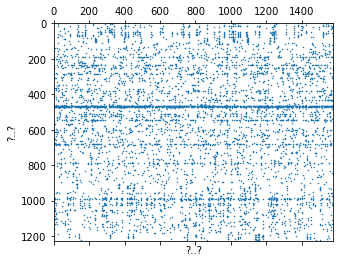

In [2]:
data_dir = "models"
model = cobra.io.read_sbml_model(join(data_dir,"D:/Anaconda/models/iMM904SL_v6.xml"))
stoich_matrix = cobra.util.create_stoichiometric_matrix(model)
plt.spy(stoich_matrix, precision=0.01, markersize=.5)
plt.xlabel('?..?');
plt.ylabel('?..?');
model
model.objective = "biomass_SC5_notrace"
print(model.objective)

1.3. Enviornmental Conditions

In [3]:

    # Anaerobic Conditions #
model.reactions.EX_o2_e_.lower_bound = -2
model.reactions.EX_o2_e_.upper_bound = 0

#Glucose
model.reactions.EX_glc_e_.lower_bound = -17.67
model.reactions.EX_glc_e_.upper_bound = -14.95

#Ala
model.reactions.EX_ala_L_e_.lower_bound = -0.0742

#Arg
model.reactions.EX_arg_L_e_.lower_bound = -0.1554

#Asp
model.reactions.EX_asn_L_e_.lower_bound = -0.0356

#Cys
model.reactions.EX_cys_L_e_.lower_bound = -0.0033

#Gln
model.reactions.EX_gln_L_e_.lower_bound = -0.1619

#Glu
model.reactions.EX_glu_L_e_.lower_bound = -0.0478

#Gly
model.reactions.EX_gly_e_.lower_bound = -0.004

#His
model.reactions.EX_his_L_e_.lower_bound = -0.0021

#Ile
model.reactions.EX_ile_L_e_.lower_bound = -0.0233

#Leu
model.reactions.EX_leu_L_e_.lower_bound = -0.0373

#Lys
model.reactions.EX_lys_L_e_.lower_bound = -0.0191

#Met
model.reactions.EX_met_L_e_.lower_bound = -0.0169

#NH4
#model.reactions.EX_nh4_e_.lower_bound = -0.53

#Phe
model.reactions.EX_phe_L_e_.lower_bound = -0.0186

#Ser
model.reactions.EX_ser_L_e_.lower_bound = -0.0653

#Thr
model.reactions.EX_thr_L_e_.lower_bound = -0.0574

#Trp
model.reactions.EX_trp_L_e_.lower_bound = -0.0106

#Tyr
model.reactions.EX_tyr_L_e_.lower_bound = -0.0027

#Val
model.reactions.EX_val_L_e_.lower_bound = -0.0269



In [4]:

  # Anaerobic Conditions #
reactions_OE = [model.reactions.EX_o2_e_]
#o2 = flux_variability_analysis(model, reaction_list = reactions_OE,
#fraction_of_optimum=0.99)
#print(o2)  
print(model.reactions.EX_o2_e_.bounds)
print(model.objective)


(-2, 0)
Maximize
1.0*biomass_SC5_notrace - 1.0*biomass_SC5_notrace_reverse_e32ff


1.4. Simulation of optimal growth and summary methods

In [ ]:
reactions = [model.reactions.EX_glc_e_, model.reactions.EX_glyc_e_, model.reactions.EX_etoh_e_, model.reactions.EX_succ_e_, model.reactions.EX_aces_e_, model.reactions.EX_lac_L_e_, model.reactions.EX_ala_L_e_, model.reactions.EX_arg_L_e_, model.reactions.EX_asn_L_e_, model.reactions.EX_cys_L_e_, model.reactions.EX_gln_L_e_, model.reactions.EX_glu_L_e_, model.reactions.EX_gly_e_, model.reactions.EX_his_L_e_, model.reactions.EX_ile_L_e_, model.reactions.EX_leu_L_e_, model.reactions.EX_lys_L_e_, model.reactions.EX_met_L_e_, model.reactions.EX_nh4_e_, model.reactions.EX_phe_L_e_, model.reactions.EX_ser_L_e_, model.reactions.EX_thr_L_e_, model.reactions.EX_trp_L_e_, model.reactions.EX_tyr_L_e_, model.reactions.EX_val_L_e_, model.reactions.EX_2mbtoh_e_, model.reactions.EX_iamoh_e_, model.reactions.EX_ibutoh_e_, model.reactions.EX_2phetoh_e_, model.reactions.EX_co2_e_]

fva=cobra.flux_analysis.flux_variability_analysis(
    model, reaction_list=reactions, fraction_of_optimum=0.99)

sys.stdout=open("wildtype_fva.txt","w")
print(fva)
sys.stdout.close()

In [ ]:
solution = model.optimize()
#biomass = model.summary() 
#print(biomass)
sys.stdout=open("wildtype_fba.txt","w")
print('Fluxes',solution.fluxes['EX_glc_e_'], solution.fluxes['EX_glyc_e_'], solution.fluxes['EX_etoh_e_'], solution.fluxes['EX_succ_e_'], solution.fluxes['EX_aces_e_'], solution.fluxes['EX_lac_L_e_'], solution.fluxes['EX_ala_L_e_'], solution.fluxes['EX_arg_L_e_'], solution.fluxes['EX_asn_L_e_'], solution.fluxes['EX_cys_L_e_'], solution.fluxes['EX_gln_L_e_'], solution.fluxes['EX_glu_L_e_'], solution.fluxes['EX_gly_e_'], solution.fluxes['EX_his_L_e_'], solution.fluxes['EX_ile_L_e_'], solution.fluxes['EX_leu_L_e_'], solution.fluxes['EX_lys_L_e_'], solution.fluxes['EX_met_L_e_'], solution.fluxes['EX_nh4_e_'], solution.fluxes['EX_phe_L_e_'], solution.fluxes['EX_ser_L_e_'], solution.fluxes['EX_thr_L_e_'], solution.fluxes['EX_trp_L_e_'], solution.fluxes['EX_tyr_L_e_'], solution.fluxes['EX_val_L_e_'], solution.fluxes['EX_2mbtoh_e_'], solution.fluxes['EX_iamoh_e_'], solution.fluxes['EX_ibutoh_e_'], solution.fluxes['EX_2phetoh_e_'], solution.fluxes['EX_co2_e_'], sep="\n")
sys.stdout.close()
print('Biomass:', solution )

In [ ]:
#sys.stdout=open("WT_biomass.txt","w")
print('Wild-type', model.reactions.biomass_SC5_notrace.flux)
#sys.stdout.close()

1.5. Escher Vizualization

In [ ]:
builder = Builder()

builder = Builder(
    map_json='model1.json'
    
)

builder.model = model
builder.reaction_data = solution.fluxes
builder.reaction_scale_preset = 'GeGaRd'
builder.save_html('C:\\Users\\João Magalhães\\Desktop\\Dissertação\\SilicoLife\\Simulations\Wildtype\\layout.html')
builder

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\history.py", line 780, in writeout_cache
    self._writeout_input_cache(conn)
  File "D:\Anaconda\lib\site-packages\IPython\core\history.py", line 763, in _writeout_input_cache
    conn.execute("INSERT INTO history VALUES (?, ?, ?, ?)",
sqlite3.IntegrityError: UNIQUE constraint failed: history.session, history.line

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\history.py", line 834, in run
    self.history_manager.writeout_cache(self.db)
  File "<decorator-gen-23>", line 2, in writeout_cache
  File "D:\Anaconda\lib\site-packages\IPython\core\history.py", line 58, in needs_sqlite
    return f(self, *a, **kw)
  File "D:\Anaconda\lib\site-packages\IPython\core\history.py", line 783, in writeout_cache
    print("ERROR! Session/line number was not uni